In [ ]:
# load libraries
from google.colab import files
import pandas as pd
import numpy as np
import datetime as dt

In [ ]:
uploaded = files.upload()

Saving Dataset.xlsx to Dataset (1).xlsx


In [ ]:
#load file
orders = pd.read_excel('Dataset.xlsx')

orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926


In [ ]:
orders.info()
# null values (if any) are already removed or filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [ ]:
returned = pd.read_excel('Dataset.xlsx', sheet_name='Return')
returned

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [ ]:
returned.info()
# null values (if any) are already removed or filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [ ]:
# merge the two tables on the 'Order ID' field
merged_df = pd.merge(orders, returned, on='Order ID', how='left')

# remove customers in table Orders with Return = Yes in table Return
merged_df = merged_df[merged_df['Returned'] != 'Yes']

merged_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,NaN
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,NaN
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,NaN
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,NaN


In [ ]:
# prepare suitable data for the RFM model
rfm_df = merged_df.groupby('Customer ID').agg({'Order Date': lambda x: (pd.to_datetime('2017-12-31') - pd.to_datetime(x.max())).days,
                                               'Order ID': 'count',
                                               'Sales': 'sum'}).reset_index()

# rename columns
rfm_df.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

rfm_df

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,11,5563.560
1,AA-10375,20,15,1056.390
2,AA-10480,260,12,1790.512
3,AA-10645,483,17,5073.975
4,AB-10015,416,6,886.156
...,...,...,...,...
786,XP-21865,83,25,2110.726
787,YC-21895,5,7,5438.650
788,YS-21880,10,12,6720.444
789,ZC-21910,55,27,7892.998


In [ ]:
# calculate the R, F, M scores for each customer (using qcut())
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=5, labels=False)
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q=5, labels=False)
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=5, labels=False)

# calculate the R-score, F-score, and M-score
rfm_df['R-score'] = 5 - rfm_df['R']
rfm_df['F-score'] = rfm_df['F'] + 1
rfm_df['M-score'] = rfm_df['M'] + 1

# merge the 3 elements
rfm_df['RFM Score'] = rfm_df['R-score'].map(str) + rfm_df['F-score'].map(str) + rfm_df['M-score'].map(str)

In [ ]:
# load dataframe of customer segmentation to each rfm_score

seg = pd.read_excel('Dataset.xlsx', sheet_name='Segmentation')
seg

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
# convert comma-separated string to a list of rfm scores

seg['RFM Score'] = seg['RFM Score'].str.split(',')
seg = seg.explode('RFM Score').reset_index(drop=True)
seg['RFM Score'] = seg['RFM Score'].astype(int)
seg.sort_values(by='RFM Score')
seg.head(10)

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
5,Champions,455
6,Champions,445
7,Loyal,543
8,Loyal,444
9,Loyal,435


In [ ]:
# convert 'RFM Score' column to int type
rfm_df['RFM Score'] = rfm_df['RFM Score'].astype(int)

In [ ]:
segment_df = rfm_df.merge(seg, on='RFM Score', how ='left')
segment_df

,Customer ID,Recency,Frequency,Monetary,R,F,M,R-score,F-score,M-score,RFM Score,Segment
0,AA-10315,185,11,5563.560,3,2,4,2,3,5,235,At Risk
1,AA-10375,20,15,1056.390,0,3,1,5,4,2,542,Potential Loyalist
2,AA-10480,260,12,1790.512,3,2,2,2,3,3,233,Hibernating customers
3,AA-10645,483,17,5073.975,4,4,4,1,5,5,155,Cannot Lose Them
4,AB-10015,416,6,886.156,4,0,1,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...,...,...,...
786,XP-21865,83,25,2110.726,2,4,2,3,5,3,353,Potential Loyalist
787,YC-21895,5,7,5438.650,0,0,4,5,1,5,515,Promising
788,YS-21880,10,12,6720.444,0,2,4,5,3,5,535,Need Attention
789,ZC-21910,55,27,7892.998,1,4,4,4,5,5,455,Champions


In [ ]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791 entries, 0 to 790
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  791 non-null    object 
 1   Recency      791 non-null    int64  
 2   Frequency    791 non-null    int64  
 3   Monetary     791 non-null    float64
 4   R            791 non-null    int64  
 5   F            791 non-null    int64  
 6   M            791 non-null    int64  
 7   R-score      791 non-null    int64  
 8   F-score      791 non-null    int64  
 9   M-score      791 non-null    int64  
 10  RFM Score    791 non-null    int64  
 11  Segment      791 non-null    object 
dtypes: float64(1), int64(9), object(2)
memory usage: 80.3+ KB


In [ ]:

customers_by_segment = segment_df.groupby('Segment')['Customer ID'].count().reset_index()

# rename column
customers_by_segment.columns = ['Segment', 'Number of Customers']

# sort value by descending order
customers_by_segment.sort_values(by='Number of Customers', ascending=False, inplace=True)

customers_by_segment

,Segment,Number of Customers
4,Hibernating customers,105
1,At Risk,97
9,Potential Loyalist,97
3,Champions,95
5,Lost customers,78
6,Loyal,74
8,New Customers,68
7,Need Attention,56
10,Promising,51
0,About To Sleep,38


<ipython-input-37-d7bd5d6a1e90>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(segment_df[col])


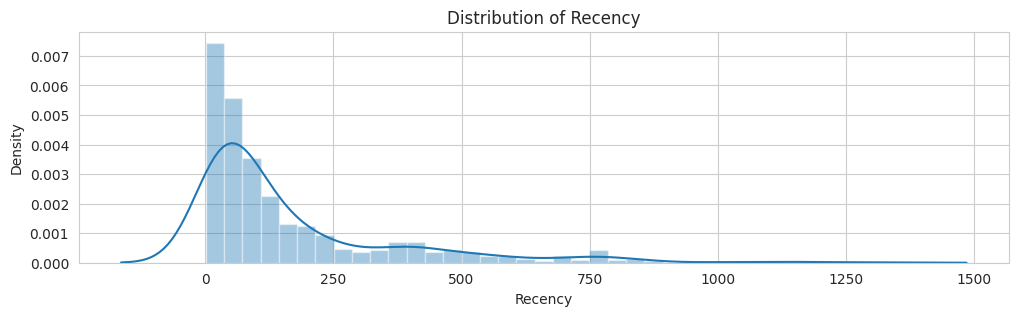

<ipython-input-37-d7bd5d6a1e90>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(segment_df[col])


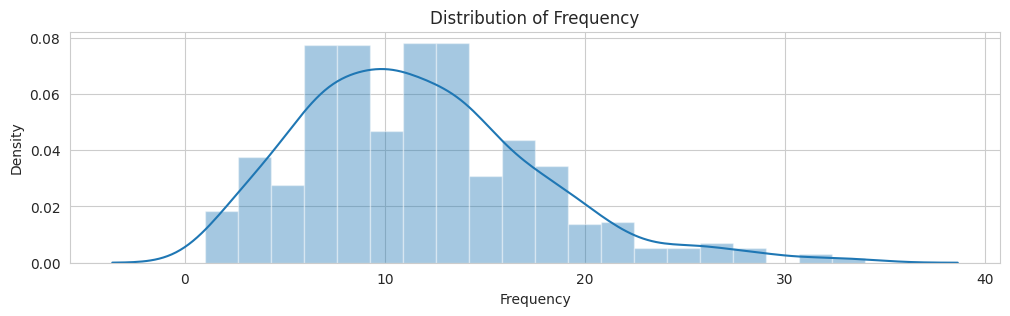

<ipython-input-37-d7bd5d6a1e90>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(segment_df[col])


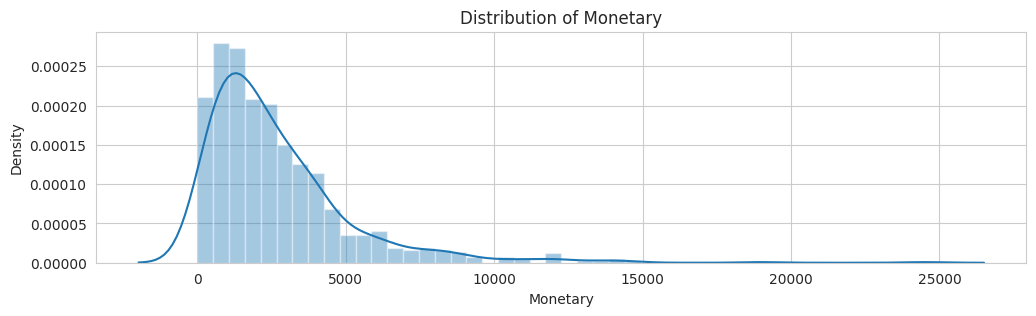

In [ ]:
# show distribution of each variable of the model

colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(segment_df[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [ ]:
# install squarify first before importing
! pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


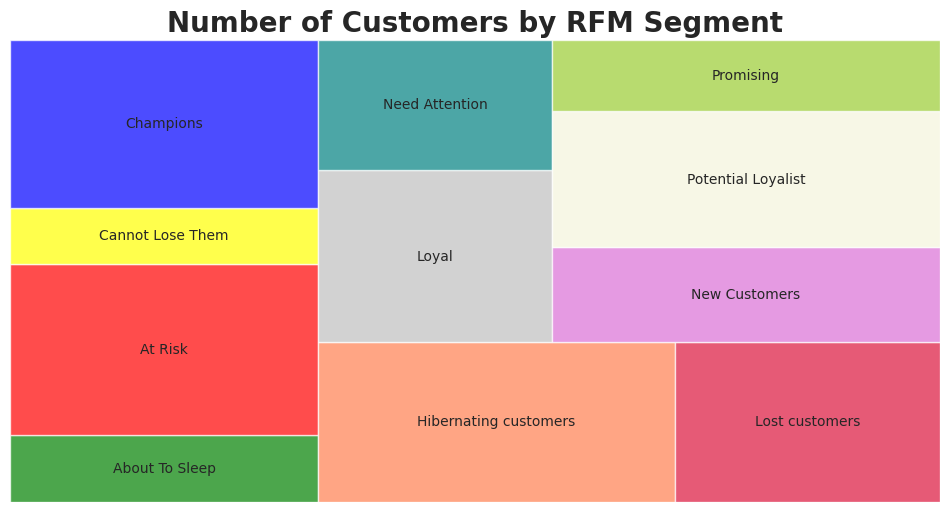

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline

# define the color scale for each segment
colors = ['green', 'red', 'yellow', 'blue', 'coral', 'crimson', 'silver', 'teal', 'orchid', 'beige', 'yellowgreen']

# group the segment_df by segment and count the number of customers
segment_counts = segment_df.groupby('Segment').size().reset_index(name='Count')

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 6)

# Plot the treemap
ax = squarify.plot(sizes=segment_counts['Count'],
                   label=segment_counts['Segment'],
                   color = colors, alpha=0.7)

# Add title and axis labels
plt.title('Number of Customers by RFM Segment', fontsize=20, fontweight='bold')
plt.axis('off')

# Show the plot
plt.show()

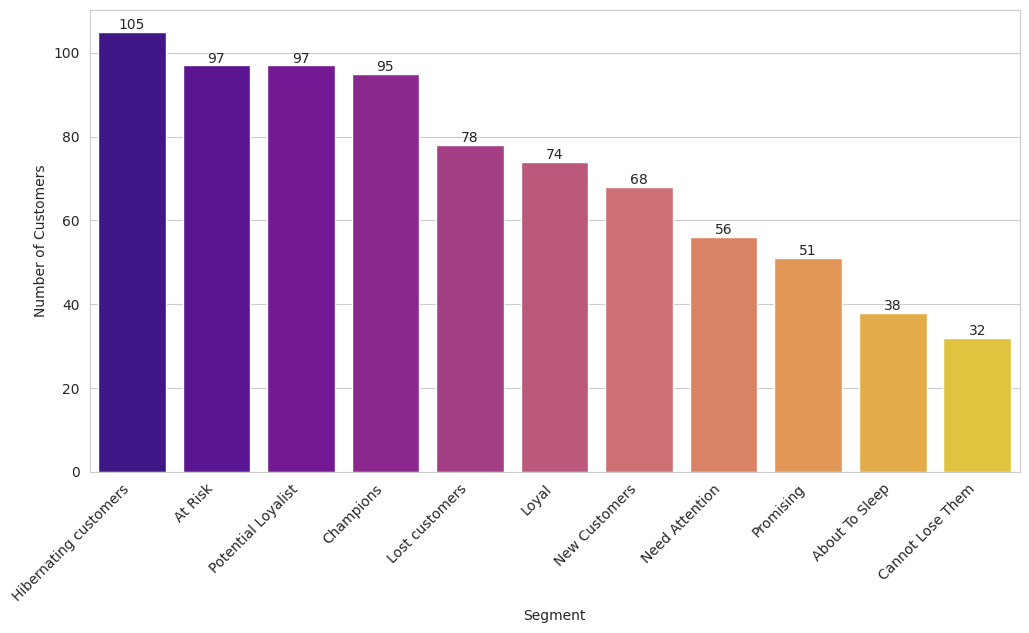

In [ ]:
# Visualize the number of customers in each segment

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
g=sns.barplot(x='Segment', y='Number of Customers', data=customers_by_segment, palette='plasma')
plt.xticks(rotation=45, ha='right')
g.bar_label(g.containers[0], label_type='edge')
plt.show()

Có 4 phân đoạn chiếm nhiều khách hàng nhất: Hibernating customers, At Risk, Potential Loyalist, Champions. Tuy nhiên, mình cũng cần phải xét trên khía cạnh mỗi nhóm khách hàng đóng góp vào doanh thu bao nhiêu mới có thể đưa ra recomendation chính xác được.

In [ ]:
totalsales_by_segment = segment_df.groupby('Segment')['Monetary'].sum().reset_index()

totalsales_by_segment

,Segment,Monetary
0,About To Sleep,39620.2380
1,At Risk,421155.6544
2,Cannot Lose Them,111892.2166
3,Champions,494779.9908
4,Hibernating customers,127413.0184
5,Lost customers,48605.0898
6,Loyal,318602.8046
7,Need Attention,207551.6079
8,New Customers,45365.1788
9,Potential Loyalist,167511.0865


In [ ]:
cus_mer_mon_by_seg = customers_by_segment.merge(totalsales_by_segment, on ='Segment')
cus_mer_mon_by_seg.sort_values(by='Monetary', ascending=False, inplace=True)
new_segment = cus_mer_mon_by_seg.set_index('Segment')
new_segment

,Number of Customers,Monetary
Segment,,
Champions,95,494779.9908
At Risk,97,421155.6544
Loyal,74,318602.8046
Need Attention,56,207551.6079
Potential Loyalist,97,167511.0865
Promising,51,134199.6966
Hibernating customers,105,127413.0184
Cannot Lose Them,32,111892.2166
Lost customers,78,48605.0898


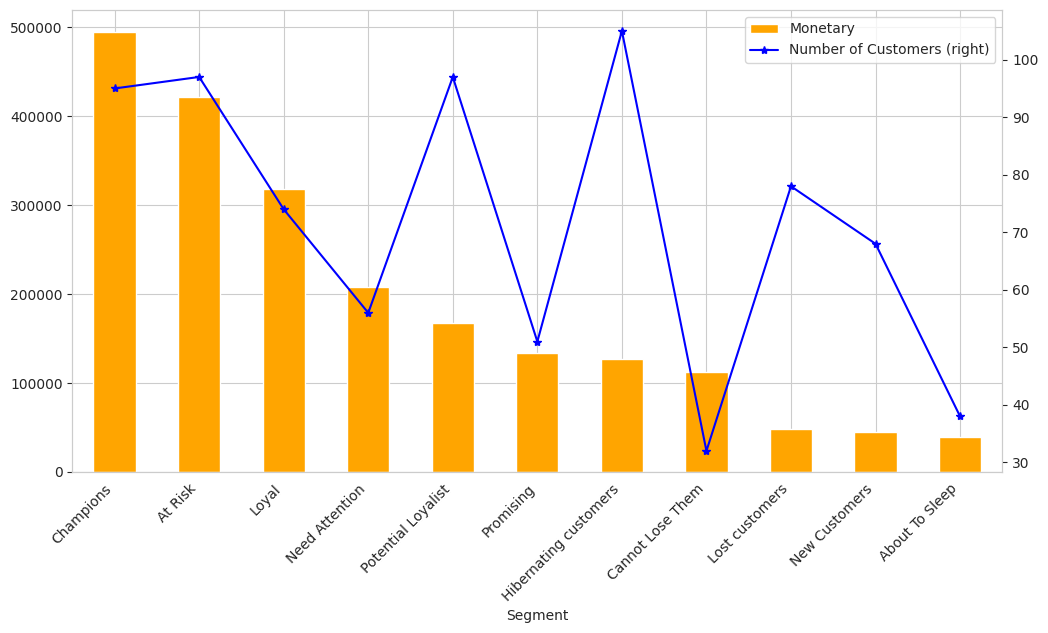

In [ ]:
# visualize the total sales and number of customers by customer segment

fig, ax = plt.subplots()
new_segment.plot(use_index=True, kind='bar', y='Monetary', ax=ax, color='orange')
new_segment.plot(use_index=True, y='Number of Customers', ax=ax, secondary_y=True, marker='*', color='blue')
fig.set_size_inches(12, 6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [ ]:
# descriptive statistics of RFM values for all segments

segment_df[['Segment','Recency','Frequency','Monetary']].groupby('Segment').agg(['mean','median','count']).sort_values(('Monetary','median'), ascending = False)

Recency               Frequency               \
                             mean median count       mean median count   
Segment                                                                  
Champions               26.789474   26.0    95  19.094737   18.0    95   
At Risk                255.835052  190.0    97  14.773196   14.0    97   
Loyal                   60.040541   65.0    74  16.445946   15.0    74   
Need Attention          59.696429   58.5    56  11.821429   12.0    56   
Cannot Lose Them       514.093750  451.5    32  12.000000    7.0    32   
Promising               30.764706   26.0    51   8.117647    8.0    51   
Potential Loyalist      44.608247   38.0    97  13.195876   12.0    97   
Hibernating customers  222.723810  171.0   105   8.571429    9.0   105   
About To Sleep         121.236842  106.5    38   8.236842    8.0    38   
New Customers           43.088235   42.0    68   5.823529    6.0    68   
Lost customers         550.602564  487.5    78   4.884615    5.0    78   

                          Monetary                   
                              mean     median count  
Segment                                              
Champions              5208.210429  4398.0000    95  
At Risk                4341.810870  3665.3470    97  
Loyal                  4305.443305  3420.7640    74  
Need Attention         3706.278712  3349.7645    56  
Cannot Lose Them       3496.631769  2960.7050    32  
Promising              2631.366600  2189.0190    51  
Potential Loyalist     1726.918418  1758.3000    97  
Hibernating customers  1213.457318  1231.4690   105  
About To Sleep         1042.637842   845.2340    38  
New Customers           667.134982   708.4725    68  
Lost customers          623.142177   559.1040    78

Như ta có thể thấy, mặc dù nhóm Hibermating Customers có lượng khách hàng cao nhất nhưng có doanh thu khá thấp nên mình chỉ tập trung vào những nhóm tạo ra doanh thu cho công ty, gồm: Champions, At Risk, Loyal, đặt biệt là nhóm Can Not Lose Them vì nhóm này ít khách hàng nhưng đómg góp vào doanh thu khá cao.

# Champions
Chúng ta có 95 khách hàng trong nhóm này. Vì nhóm này có nhiều khách hàng mua hàng có value và volume lớn nên doanh thu xếp đầu tiên.
  Do đó, nhóm khách hàng này đã có sự tin tưởng và cam kết cao với doanh nghiệp mình, nên mình:
  + Không nên giảm giá bởi vì nhóm khách hàng này không quan tâm đến giá của sản phẩm mà quan tâm đến chất lượng của sản phẩm cũng như việc tự khẳng định bản thân thông qua việc sử dụng sản phẩm (nhu cầu Maslow bậc 5)  
  + Cho ra các dòng sản phẩm với nhiều cải tiến cũng như bổ sung thêm các mẫu mã, kết hợp với việc cá nhân hóa ở theo nhu cầu riêng biệt để thỏa mãn nhu cầu tự khẳng định của khách hàng.
  + Tạo ra các chương trình khách hàng thân thiết, các câu lạc bộ khách hàng nơi mà họ được xếp hạng với những khách hàng khác.  
  + Quan tâm đến nhu cầu chưa được khai thác của khách hàng thông qua các tương tác trên nền tảng mạng xã hội hoặc các lần mua hàng của khách hàng để có thể nghe được những quan điểm, ý kiến của họ. Nhóm khách hàng này luôn sẵn sàng góp ý cho doanh nghiệp. Từ những sự đóng góp đó doanh nghiệp có thể tạo ra các giải pháp cho doanh nghiệp (phát triển và cải thiện sản phẩm và dòng sản phẩm, quy trình phục vụ)

# At Risk
Nhóm này có 97 khách hàng. Nhóm này đứng thứ 2 về số lượng khách hàng. Họ đã từng mua hàng với value và volume trung bình nhưng gần đây họ không mua nữa. Mình mới đặt ra những câu hỏi là vì sao lại xảy ra hiện tượng như vậy? Có phải vì họ có những sản phẩm thay thế từ các công ty đối thủ có cùng phân khúc hay là họ chưa hài lòng với chất lượng, dịch vụ của công ty mình?
Do đó, mình cần nên làm survey dể tìm ra nguyên nhân. Với nhóm này mình nên đề cao những giá trị của sản phẩm hơn là việc chạy những chương trình khuyến mãi.

# Loyal
Nhóm này có 74 khách hàng. Nhóm này mua hàng rất tích cực, nhưng volume không lớn. Vậy làm thế nào để nâng cao giá trị giỏ hàng trong mỗi lần mua? Để làm được điều đó, doanh nghiệp cần:
+ Thực hiện Up - selling, Cross - selling để bán các sản phẩm có giá trị cao hơn và các sản phẩm bổ sung cho khách hàng góp phần gia tăng doanh thu cho doanh nghiệp.
+ Xây dựng các chương trình khách hàng trung thành, các câu lạc bộ khách hàng.  
+ Thời kỳ cạnh tranh như hiện tại thì giá trị cốt lõi và giá trị chung của sản phẩm thì sẽ ít có sự khác biệt giữa các doanh nghiệp vì vậy cần tạo cũng như bổ sung nhiều giá trị tăng thêm (qua dịch vụ hoặc sản phẩm đi kèm) để khác biệt hóa so với đối thủ cạnh tranh.
+ Thường xuyên tương tác và ghi nhận các phản hồi từ khách hàng để có thể hiểu rõ và đáp ứng nhu cầu của khách hàng thông qua các sản phẩm mới.

# Can Not Lose Them
Nhóm này chỉ có 32 khách hàng nhưng trung bình mỗi khách hàng đóng góp hơn 2960 USA vào doanh thu. Nếu công ty đánh mạnh vào nhóm phân khúc này, nhóm này sẽ đóng góp vào doanh thu rất cao. Nhóm này có đặc tính giống với nhóm At Risk nhưng tần suất mua hàng kém hơn At Risk. Vậy nên, mình cần xem xét xem họ đã thực sự rời bỏ doanh nghiệp hay chưa qua lịch sử mua hàng, qua các chương trình xúc tiến bán hàng (mã giảm giá, khuyến mãi,...). Nếu họ vẫn không phản ứng thì doanh nghiệp không cần phải tốn các chi phí để giữ chân nhóm khách hàng này. Nếu họ còn phản ứng với các chương trình xúc tiến bán hàng thì doanh nghiệp cần phải tìm hiểu:
+ Nếu các đối thủ cạnh tranh phục vụ  họ tốt hơn về  mặt  chất lượng thì  mình cần phải cải tiến sản phẩm để bổ sung những tính năng mới, công dụng mới hoặc đầu vào mới để thay thế cho sản phẩm hiện tại.  
+ Xem xét lại định vị hiện tại của doanh nghiệp cho từng sản phẩm xem có còn phù hợp với khách hàng hay không. Nếu không thì cần tạo lại nhu cầu mới thông qua các sản phẩm mới để phù hợp với khách hàng. Bên cạnh đó cần mở rộng danh mục sản phẩm hoặc mở rộng dòng sản phẩm hiện có để đáp ứng được nhu cầu mới của khách hàng. Ngoài ra cần tạo ra các sản phẩm mới thông qua nhu cầu chưa được đáp ứng của khách hàng hoặc nhu cầu mà khách hàng chưa nghĩ tới.
+ Nếu sản phẩm không có nhiều khác biệt về lớp sản phẩm cốt lõi và sản phẩm chung thì giá và giá trị sản phẩm tăng thêm sẽ là yếu tố quyết định. Vì vậy, doanh nghiệp nên:  
 * Giá: doanh nghiệp cần tối ưu hóa quy trình sản xuất, cập nhật các quy trình công nghệ mới, tập trung vào thiết kế và sản xuất nhiều để có tính kinh tế theo quy mô và đưa ra những ưu đãi hấp dẫn.
 * Giá trị sản phẩm tăng thêm: dịch vụ giao hàng, đổi trả, sản phẩm tặng kèm….